# Mettre en place notre environnement
________

La première chose que nous devons faire est de charger les bibliothèques et les ensembles de données que nous allons utiliser. Pour aujourd'hui, nous allons travailler avec deux ensembles de données : un contenant des chroniques de température dans le lit de la rivière (zone hyporhéique), et un autre contenant des les chroniques de différence de charge enregistré en **Volt**.

**Important!** Assurez-vous d'exécuter cette cellule vous-même ou le reste de votre code ne fonctionnera pas

In [67]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# C:/Users/nilss/Desktop/tp_molo_1/MOLONARI_1D_RESOURCES
# read in our data
capteur_riviere = pd.read_csv("C:/Users/nilss/Desktop/tp_molo_1/MOLONARI_1D_RESOURCES/sampling_points/Point034/point034_P_measures.csv")
capteur_ZH = pd.read_csv("C:/Users/nilss/Desktop/tp_molo_1/MOLONARI_1D_RESOURCES/sampling_points/Point034/point034_T_measures.csv")
etalonage_capteur_riv = pd.read_csv("C:/Users/nilss/Desktop/tp_molo_1/MOLONARI_1D_RESOURCES/configuration/pressure_sensors/P508.csv")

# set seed for reproducibility
np.random.seed(0)

Nous sommes maintenant prêts à examiner quelques dates ! (Si vous le souhaitez, vous pouvez profiter de cette occasion pour jeter un coup d'œil à certaines des données).

# Imprimez le noms des colonnes
renommer les colonnes du fichier capteur_riviere :  	dates,tension_V,temperature_stream_C et celles du fichier capteur_ZH  :
#,dates,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C



In [68]:
capteur_riviere = capteur_riviere.drop([0], axis = 0).drop(['Titre de tracé : point_montberneux','Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis = 1)
capteur_riviere.columns = ['dates', 'tension_V', 'temperature_stream_C']

capteur_ZH = capteur_ZH.reset_index().drop([0], axis = 0).drop(['level_6', 'level_7', 'Titre de tracé : T520'], axis = 1)
capteur_ZH.columns = ['#','dates','temperature_depth_1_C','temperature_depth_2_C','temperature_depth_3_C','temperature_depth_4_C']


In [69]:
capteur_riviere.head()

,dates,tension_V,temperature_stream_C
1,06/27/16 12:00:00 PM,1.26787,18.342
2,06/27/16 12:15:00 PM,1.0663,13.898
3,06/27/16 12:30:00 PM,1.20661,13.915
4,06/27/16 12:45:00 PM,1.24533,13.939
5,06/27/16 01:00:00 PM,1.24437,13.967


In [70]:
capteur_ZH.head()

,#,dates,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C
1,1,06/27/16 12:00:00 PM,13.810,13.834,13.858,13.810
2,2,06/27/16 12:15:00 PM,13.834,13.858,13.882,13.834
3,3,06/27/16 12:30:00 PM,13.930,13.954,14.050,14.002
4,4,06/27/16 12:45:00 PM,13.882,13.954,14.026,13.954
5,5,06/27/16 01:00:00 PM,13.858,13.930,14.026,13.954


# Transformez les données de différence de charge en mètres



In [79]:
etalonage_capteur_riv.head()

,Sensor_Name,P508
0,Datalogger,Hobo
1,Calibration_Date,2016/01/12 10:10:10
2,Intercept,1.210344
3,dU/dH,-1.462495
4,dU/dT,0.001474


In [80]:
intercept = float(etalonage_capteur_riv['P508'][2])
a = float(etalonage_capteur_riv['P508'][3])
b = float(etalonage_capteur_riv['P508'][4])
print(intercept, a ,b)

1.210344 -1.462495 0.001474


In [83]:
capteur_riviere['diff_charge_m'] = (capteur_riviere['tension_V'].astype(float)-intercept-capteur_riviere['temperature_stream_C'].astype(float)*b)/a

capteur_riviere.head()

,dates,tension_V,temperature_stream_C,diff_charge_m
1,06/27/16 12:00:00 PM,1.26787,18.342,-0.020848
2,06/27/16 12:15:00 PM,1.0663,13.898,0.112499
3,06/27/16 12:30:00 PM,1.20661,13.915,0.016578
4,06/27/16 12:45:00 PM,1.24533,13.939,-0.009873
5,06/27/16 01:00:00 PM,1.24437,13.967,-0.009189


# Traitement des dates
## Vérifiez le type de données de notre colonne de date
___

Imprimer les dates des deux fichiers

In [88]:
capteur_riviere['dates']

1       06/27/16 12:00:00 PM
2       06/27/16 12:15:00 PM
3       06/27/16 12:30:00 PM
4       06/27/16 12:45:00 PM
5       06/27/16 01:00:00 PM
                ...         
1456        07/12/2016 15:45
1457        07/12/2016 16:00
1458        07/12/2016 16:15
1459        07/12/2016 16:30
1460        07/12/2016 16:45
Name: dates, Length: 1460, dtype: object

In [89]:
capteur_ZH['dates']

1       06/27/16 12:00:00 PM
2       06/27/16 12:15:00 PM
3       06/27/16 12:30:00 PM
4       06/27/16 12:45:00 PM
5       06/27/16 01:00:00 PM
                ...         
1434    07/12/16 10:15:00 AM
1435    07/12/16 10:30:00 AM
1436    07/12/16 10:45:00 AM
1437    07/12/16 10:49:31 AM
1438    07/12/16 10:49:47 AM
Name: dates, Length: 1438, dtype: object

Remarquez qu'en bas de la sortie de `head()`, vous pouvez voir qu'il est dit que le type de données de cette colonne est "object". 

> Pandas utilise le dtype "object" pour stocker différents types de données, mais le plus souvent, lorsque vous voyez une colonne avec le dtype "object", elle contient des chaînes de caractères. 

Si vous consultez la documentation sur le dtype de Pandas [ici] (http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes), vous remarquerez qu'il existe également un dtype spécifique `datetime64`. Comme le dtype de notre colonne est `object` plutôt que `datetime64`, nous pouvons dire que Python ne sait pas que cette colonne contient des dates.

Nous pouvons aussi regarder uniquement le dtype de votre colonne sans imprimer les premières lignes si nous le souhaitons :

In [90]:
# check the data type of our date column
capteur_riviere.dtypes

dates                    object
tension_V                object
temperature_stream_C     object
diff_charge_m           float64
dtype: object

In [91]:
capteur_ZH.dtypes

#                        object
dates                    object
temperature_depth_1_C    object
temperature_depth_2_C    object
temperature_depth_3_C    object
temperature_depth_4_C    object
dtype: object

You may have to check the [numpy documentation](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind) to match the letter code to the dtype of the object. "O" is the code for "object", so we can see that these two methods give us the same information.

## Convertir nos colonnes de date en datetime
___

Maintenant que nous savons que notre colonne de date n'est pas reconnue comme une date, il est temps de la convertir pour qu'elle soit reconnue comme une date. Cette opération est appelée "analyse syntaxique des dates" car nous prenons une chaîne de caractères et identifions ses composants. Nous allons utiliser la fonction pd.to_datetime.

Nous pouvons indiquer à pandas le format de nos dates à l'aide d'un guide appelé ["strftime directive", sur lequel vous trouverez plus d'informations à ce lien] (http://strftime.org/). L'idée de base est que vous devez indiquer quelles parties de la date se trouvent où et quelle ponctuation se trouve entre elles. Il existe [de nombreuses parties possibles d'une date](http://strftime.org/), mais les plus courantes sont `%d` pour le jour, `%m` pour le mois, `%y` pour une année à deux chiffres et `%Y` pour une année à quatre chiffres.

Quelques exemples :

 * Le 17 janvier 2007 a le format "%m/%d/%y".
 * 17-1-2007 a le format "%d-%m-%Y".
 

In [95]:
capteur_riviere['dates'] = pd.to_datetime(capteur_riviere['dates'], infer_datetime_format=True)
capteur_ZH['dates'] = pd.to_datetime(capteur_ZH['dates'], infer_datetime_format=True)
capteur_riviere['dates']

1      2016-06-27 12:00:00
2      2016-06-27 12:15:00
3      2016-06-27 12:30:00
4      2016-06-27 12:45:00
5      2016-06-27 13:00:00
               ...        
1456   2016-07-12 15:45:00
1457   2016-07-12 16:00:00
1458   2016-07-12 16:15:00
1459   2016-07-12 16:30:00
1460   2016-07-12 16:45:00
Name: dates, Length: 1460, dtype: datetime64[ns]

Maintenant que nos dates sont analysées correctement, nous pouvons travailler avec celles-ci.

___
* Bien que nous spécifions le format de la date ici, il arrive parfois que vous rencontriez une erreur lorsque plusieurs formats de date sont présents dans une même colonne. Dans ce cas, vous pouvez demander à pandas de déduire le bon format de date. Vous pouvez le faire comme suit :

`capteur_riviere['date'] = pd.to_datetime(capteur_riviere['date'], infer_datetime_format=True)``

**Pourquoi ne pas toujours utiliser `infer_datetime_format = True?`** Il y a deux grandes raisons de ne pas toujours faire deviner à pandas le format de l'heure. La première est que pandas n'est toujours capable de trouver le bon format de date, surtout si quelqu'un a fait preuve de créativité dans la saisie des données. La seconde est que c'est beaucoup plus lent que de spécifier le format exact des dates.
____

## Tracer le jour du mois pour vérifier l'analyse de la date
___

L'un des plus grands dangers de l'analyse des dates est de mélanger les mois et les jours. La fonction to_datetime() a des messages d'erreur très utiles, mais il n'est pas inutile de vérifier que les jours du mois que nous avons extraits ont un sens. 

Pour ce faire, nous allons tracer un histogramme des jours du mois. Nous nous attendons à ce qu'il ait des valeurs entre 1 et 31 et, puisqu'il n'y a aucune raison de supposer que les glissements de terrain sont plus fréquents certains jours du mois que d'autres, une distribution relativement égale. (Avec un creux sur 31 car tous les mois n'ont pas 31 jours.) 

<AxesSubplot:>

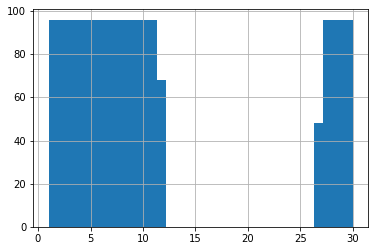

In [98]:
capteur_riviere['dates'].dt.day.hist(bins = 31)

# Valeurs aberrantes

L'un des plus grands défis du nettoyage des données est l'identification et le traitement des valeurs aberrantes. En termes simples, les valeurs aberrantes sont des observations qui sont significativement différentes des autres points de données. Même les meilleurs algorithmes d'estimation des paramètres automatique seront moins performants si les observations aberrantes ne sont pas nettoyées des données, car elles impliquent des simulations obsolètes des variables.



In [100]:
print(capteur_riviere.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   dates                 1460 non-null   datetime64[ns]
 1   tension_V             1460 non-null   object        
 2   temperature_stream_C  1460 non-null   object        
 3   diff_charge_m         1460 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 57.0+ KB
None


## Identification des valeurs aberrantes

La présence de valeurs aberrantes dans les données peut avoir de nombreuses raisons. Parfois, les valeurs aberrantes peuvent être authentiques, alors que dans d'autres cas, elles peuvent être dues à des erreurs de saisie de données. Il est important de comprendre les raisons des valeurs aberrantes avant de les nettoyer.

Nous allons commencer le processus de recherche des valeurs aberrantes en exécutant les statistiques sommaires sur les variables. Pour ce faire, nous utilisons la fonction describe() ci-dessous, qui fournit un résumé statistique de toutes les variables quantitatives.




## Tracez les graphiques de distribution pour les différentes variables

In [120]:
capteur_riviere[["temperature_stream_C"]].describe()

,temperature_stream_C
count,1460
unique,1095
top,14.306
freq,9


<AxesSubplot:>

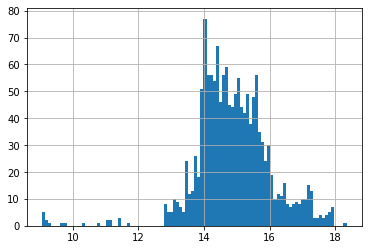

In [103]:
capteur_riviere['temperature_stream_C'].astype(float).hist(bins=100)

In [122]:
capteur_riviere[['diff_charge_m']].describe()

,diff_charge_m
count,1460.000000
mean,-0.016812
std,0.032176
min,-0.140099
25%,-0.025327
50%,-0.020557
75%,-0.009784
max,0.390494


<AxesSubplot:>

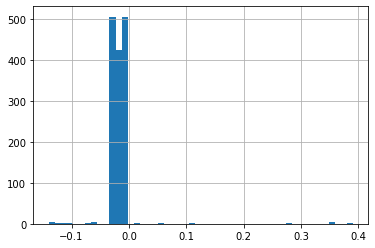

In [106]:
capteur_riviere['diff_charge_m'].astype(float).hist(bins=50)

In [123]:
capteur_ZH[['temperature_depth_1_C']].describe()

,temperature_depth_1_C
count,1436
unique,144
top,14.529
freq,30


<AxesSubplot:>

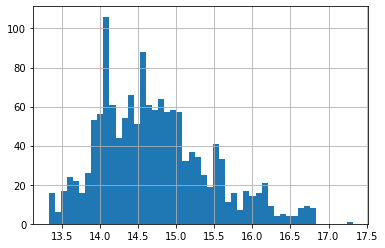

In [107]:
capteur_ZH['temperature_depth_1_C'].astype(float).hist(bins=50)

In [124]:
capteur_ZH[['temperature_depth_2_C']].describe()

,temperature_depth_2_C
count,1436
unique,99
top,14.050
freq,49


<AxesSubplot:>

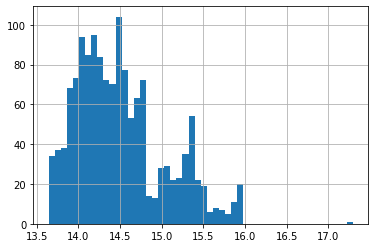

In [109]:
capteur_ZH['temperature_depth_2_C'].astype(float).hist(bins=50)

In [125]:
capteur_ZH[['temperature_depth_3_C']].describe()

,temperature_depth_3_C
count,1436
unique,72
top,14.098
freq,64


<AxesSubplot:>

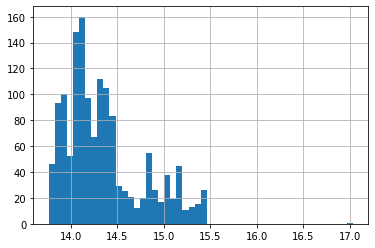

In [110]:
capteur_ZH['temperature_depth_3_C'].astype(float).hist(bins=50)

In [126]:
capteur_ZH[['temperature_depth_4_C']].describe()

,temperature_depth_4_C
count,1436
unique,52
top,13.930
freq,92


<AxesSubplot:>

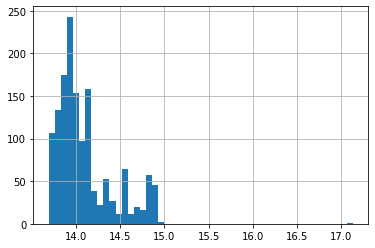

In [111]:
capteur_ZH['temperature_depth_4_C'].astype(float).hist(bins=50)

## Trouver les valeurs limites